# Title

** Basic Multi-classification**

# Description
The goal of the exercise is to get comfortable using multiclass classification models.


# Instructions: 
We are trying to predict the types of Irises in the classic <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" target="_blank">Iris data set</a> based on measured characteristics
- Load the Iris data set and convert to a data frame.
- Fit  multinomial & OvR logistic regressions and a $k$-NN model. 
- Compute the accuracy of the models.
- Plot the classification boundaries against the two predictors used.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a> : Accuracy classification score.

<a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.pcolormesh.html" target="_blank">matplotlib.pcolormesh()</a> : Accuracy classification score


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

## Irises

Read in the data set and convert to a Pandas data frame:

In [3]:
raw = datasets.load_iris()
iris = pd.DataFrame(raw['data'],columns=raw['feature_names'])
iris['type'] = raw['target'] 
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Note: this violin plot is 'inverted': putting the response variable in the model on the x-axis.  This is fine for exploration

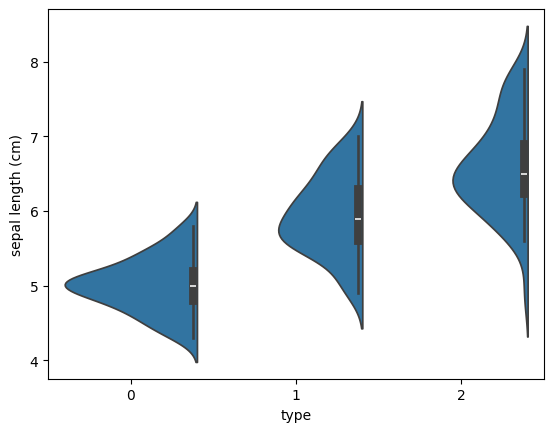

In [ ]:
sns.violinplot(y=iris['sepal length (cm)'], x=iris['type'], split=True);

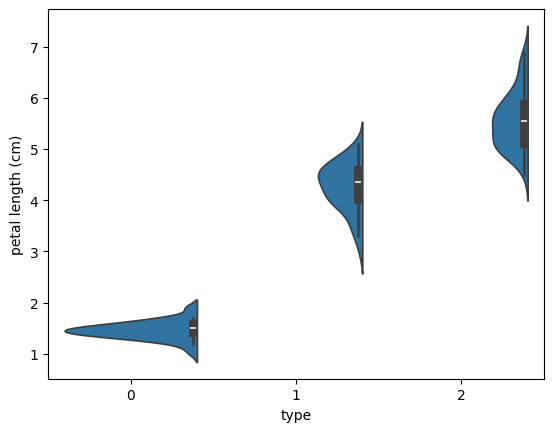

In [10]:
# Create a violin plot to compare petal length 
# across the types of irises

sns.violinplot(y=iris['petal length (cm)'], x=iris['type'], split=True);

Here we fit our first model (the OvR logistic) and print out the coefficients:

In [11]:
logit_ovr = LogisticRegression(multi_class='ovr',max_iter = 1000).fit(
    iris[['sepal length (cm)','sepal width (cm)']], iris['type'])
print(logit_ovr.intercept_)
print(logit_ovr.coef_)


[  8.32315487   5.68615002 -12.52959903]
[[-3.38828053  3.1645602 ]
 [ 0.12717562 -2.38539599]
 [ 2.22195969 -0.51274517]]


C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
# we can predict classes or probabilities
print(logit_ovr.predict(iris[['sepal length (cm)','sepal width (cm)']])[0:5])
print(logit_ovr.predict_proba(iris[['sepal length (cm)','sepal width (cm)']])[0:5])

[0 0 0 0 0]
[[0.84360194 0.11124823 0.04514983]
 [0.69398076 0.27009269 0.03592655]
 [0.80138543 0.178278   0.02033657]
 [0.77760827 0.20572463 0.0166671 ]
 [0.87799483 0.08770916 0.034296  ]]


In [12]:
# and calculate accuracy
print(logit_ovr.score(iris[['sepal length (cm)','sepal width (cm)']],iris['type']))

0.8066666666666666


Now it's your turn: but this time with the multinomial logistic regression.

In [13]:
### edTest(test_multinomial) ###

# Fit the model and print out the coefficients
logit_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000).fit(iris[['sepal length (cm)','sepal width (cm)']], iris['type'])
intercept = logit_multi.intercept_
coefs = logit_multi.coef_
print(intercept)
print(coefs)

[ 7.91140003  1.84697777 -9.75837781]
[[-2.70858405  2.32402607]
 [ 0.61260073 -1.57100532]
 [ 2.09598332 -0.75302075]]


C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [14]:
### edTest(test_multinomialaccuracy) ###

multi_accuracy = logit_multi.score(iris[['sepal length (cm)','sepal width (cm)']],iris['type'])
print(multi_accuracy)

0.82


C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


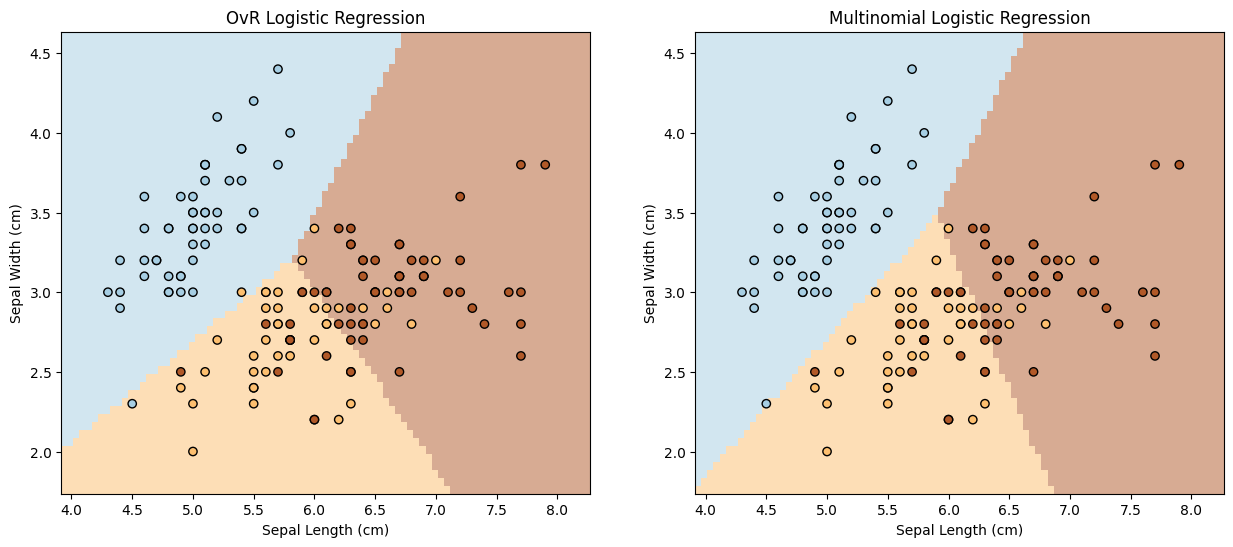

In [16]:
# Plot the decision boundary. 
x1_range = iris['sepal length (cm)'].max() - iris['sepal length (cm)'].min()
x2_range = iris['sepal width (cm)'].max() - iris['sepal width (cm)'].min()
x1_min, x1_max = iris['sepal length (cm)'].min()-0.1*x1_range, iris['sepal length (cm)'].max() +0.1*x1_range
x2_min, x2_max = iris['sepal width (cm)'].min()-0.1*x2_range, iris['sepal width (cm)'].max() + 0.1*x2_range

step = .05 
x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
y_hat_ovr = logit_ovr.predict(np.c_[x1x.ravel(), x2x.ravel()])
y_hat_multi = logit_multi.predict(np.c_[x1x.ravel(), x2x.ravel()])
y_hat_ovr = y_hat_ovr.reshape(x1x.shape)


fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(15, 6))

ax1.pcolormesh(x1x, x2x, y_hat_ovr.reshape(x1x.shape), cmap=plt.cm.Paired,alpha = 0.5)
ax1.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['type'], edgecolors='k', cmap=plt.cm.Paired)

### your job is to create the same plot, but for the multinomial
#####
# your code here
ax1.set_title("OvR Logistic Regression")
ax1.set_xlabel("Sepal Length (cm)")
ax1.set_ylabel("Sepal Width (cm)")

# Plot the decision boundary for the multinomial logistic regression model
ax2.pcolormesh(x1x, x2x, y_hat_multi.reshape(x1x.shape), cmap=plt.cm.Paired, alpha=0.5)
ax2.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['type'], edgecolors='k', cmap=plt.cm.Paired)
ax2.set_title("Multinomial Logistic Regression")
ax2.set_xlabel("Sepal Length (cm)")
ax2.set_ylabel("Sepal Width (cm)")


plt.show()

In [22]:
#fit a knn model (k=5) for the same data 
knn5 = KNeighborsClassifier(n_neighbors=5).fit(iris[['sepal length (cm)','sepal width (cm)']], iris['type'])

In [23]:
### edTest(test_knnaccuracy) ###

#Calculate the accuracy
knn5_accuracy = knn5.score(iris[['sepal length (cm)','sepal width (cm)']],iris['type'])
knn5_accuracy

0.8333333333333334

C:\Users\cleon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


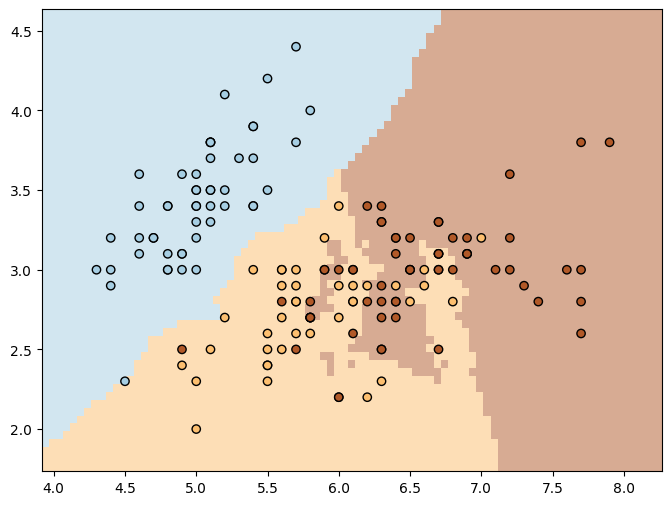

In [24]:
# and plot the classification boundary

y_hat_knn5 = knn5.predict(np.c_[x1x.ravel(), x2x.ravel()])

fig, ax1 = plt.subplots(1, 1,  figsize=(8, 6))

ax1.pcolormesh(x1x, x2x, y_hat_knn5.reshape(x1x.shape), cmap=plt.cm.Paired,alpha = 0.5)
# Plot also the training points
ax1.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=iris['type'], edgecolors='k', cmap=plt.cm.Paired)

plt.show()